# Analisis Performa Pelajar Dalam Ujian

## Tujuan Penelitian

### untuk mengetahui faktor-faktor yang mempengaruhi performa pelajar

## Hasil yang ingin dicapai

### 1. Bagaimana cara meningkatkan prestasi siswa dalam setiap ujian?
### 2. Apa faktor utama yang mempengaruhi nilai ujian?
### 3. Apakah kursus persiapan ujian efektif?
### 4. Kesimpulan.



### import library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## melakukan import dan menampilkan data

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### melihat info jenis data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### melihat deskripsi umum data, seperti nilai rata-rata, standar deviasi, minimum, dan maximum

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### melihat panjang data

In [7]:
print(f'panjang data adalah: {len(df)}')

panjang data adalah: 1000


### melihat apakah ada 'missing value' pada data

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Tidak ada missing value pada data

# menganalisis sebaran math score

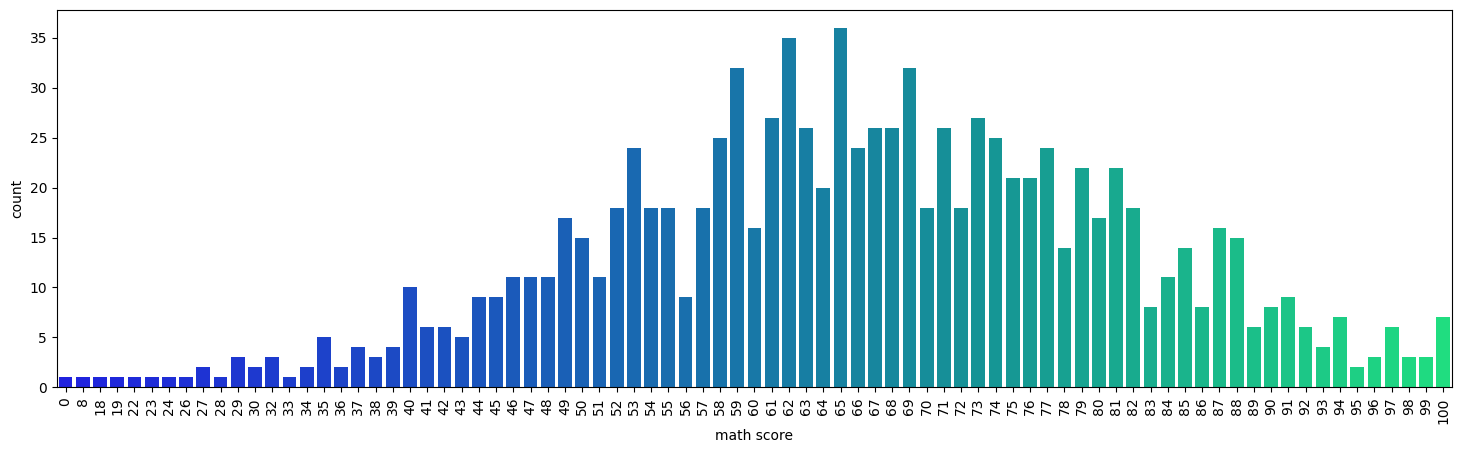

In [9]:
fig,ax = plt.subplots(figsize=(18,5),dpi=100)

sns.countplot(x=df['math score'], palette="winter")
for label in ax.get_xticklabels():
    label.set(fontsize=10,rotation=90)

# Menentukan batasan nilai untuk kelulusan

In [10]:
batas_lulus = 60

# membuat kolom yang berisi data pelajar yang lulus dan yang tidak lulus dalam ujian matematika

In [11]:
df['Math_PassStatus'] = np.where(df['math score']<batas_lulus, 'No', 'Pass')
df.Math_PassStatus.value_counts()

Pass    677
No      323
Name: Math_PassStatus, dtype: int64

# Mengetahui berapa banyak pelajar yang lolos ujian matematika berdasarkan tingkat pendidikan orang tua

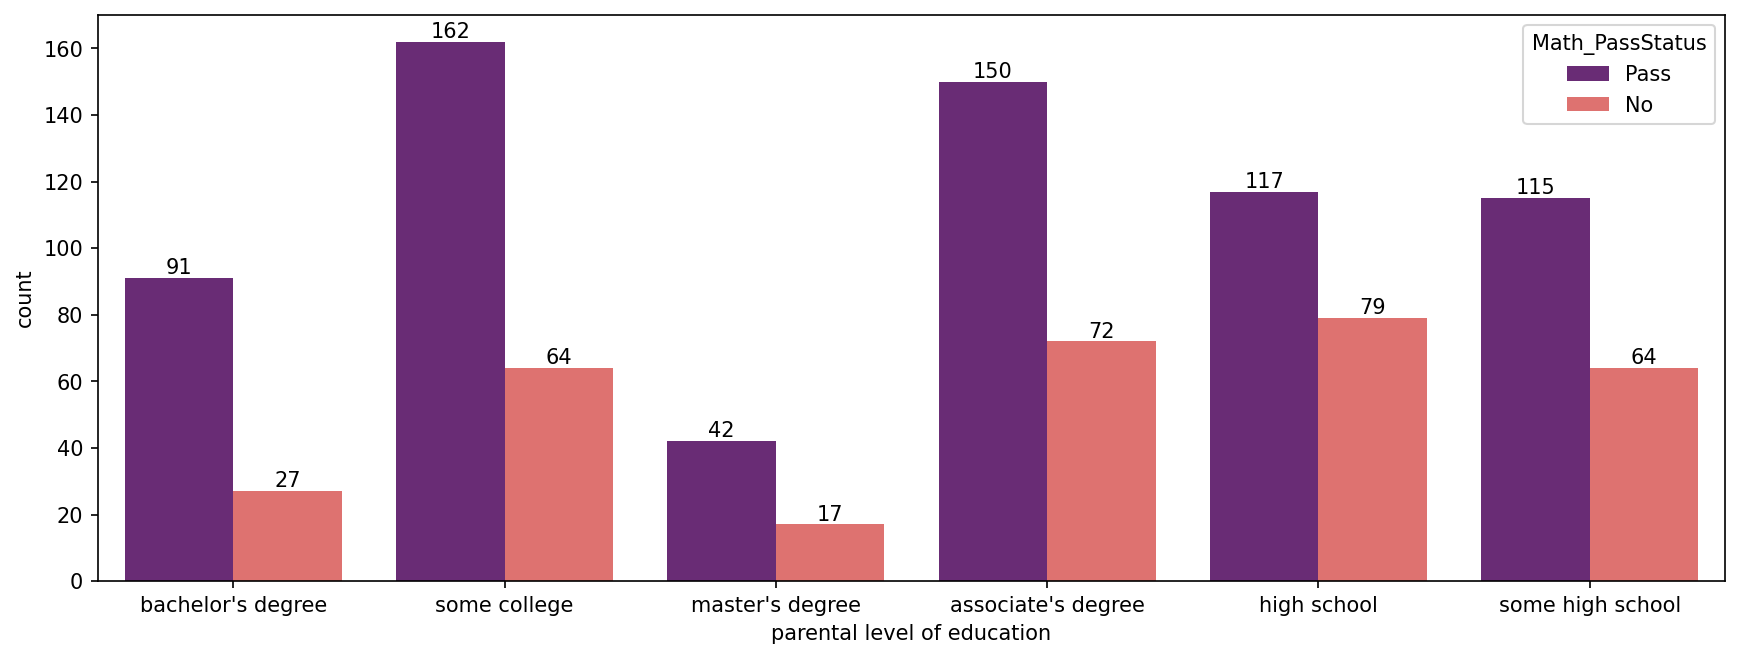

In [12]:
fig,ax = plt.subplots(figsize=(14,5),dpi=150)
sns.countplot(x=df['parental level of education'],hue=df['Math_PassStatus'],palette='magma');

for container in ax.containers:
    ax.bar_label(container)

# Menganalisis sebaran reading score

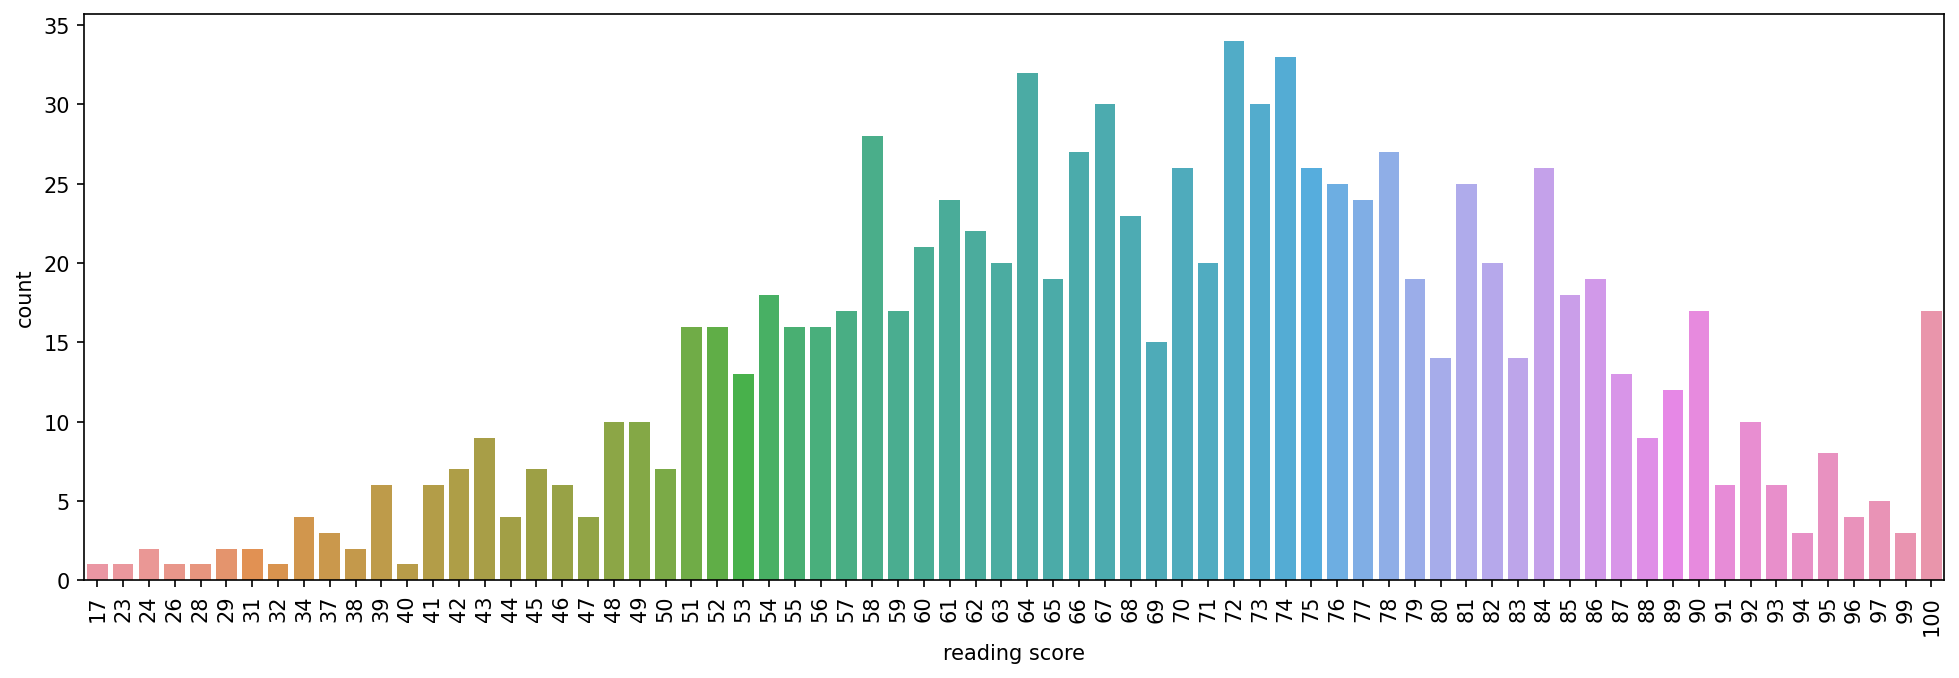

In [13]:
fig,ax = plt.subplots(figsize=(16,5),dpi=150)

sns.countplot(x=df['reading score'])
for label in ax.get_xticklabels():
    label.set(fontsize=10,rotation=90)

# membuat kolom yang berisi data pelajar yang lulus dan yang tidak lulus dalam ujian membaca

In [14]:
df['Reading_PassStatus'] = np.where(df['math score']<batas_lulus, 'No', 'Pass')
df['Reading_PassStatus'].value_counts()

Pass    677
No      323
Name: Reading_PassStatus, dtype: int64

# Mengetahui berapa banyak pelajar yang lolos ujian mebaca berdasarkan tingkat pendidikan orang tua

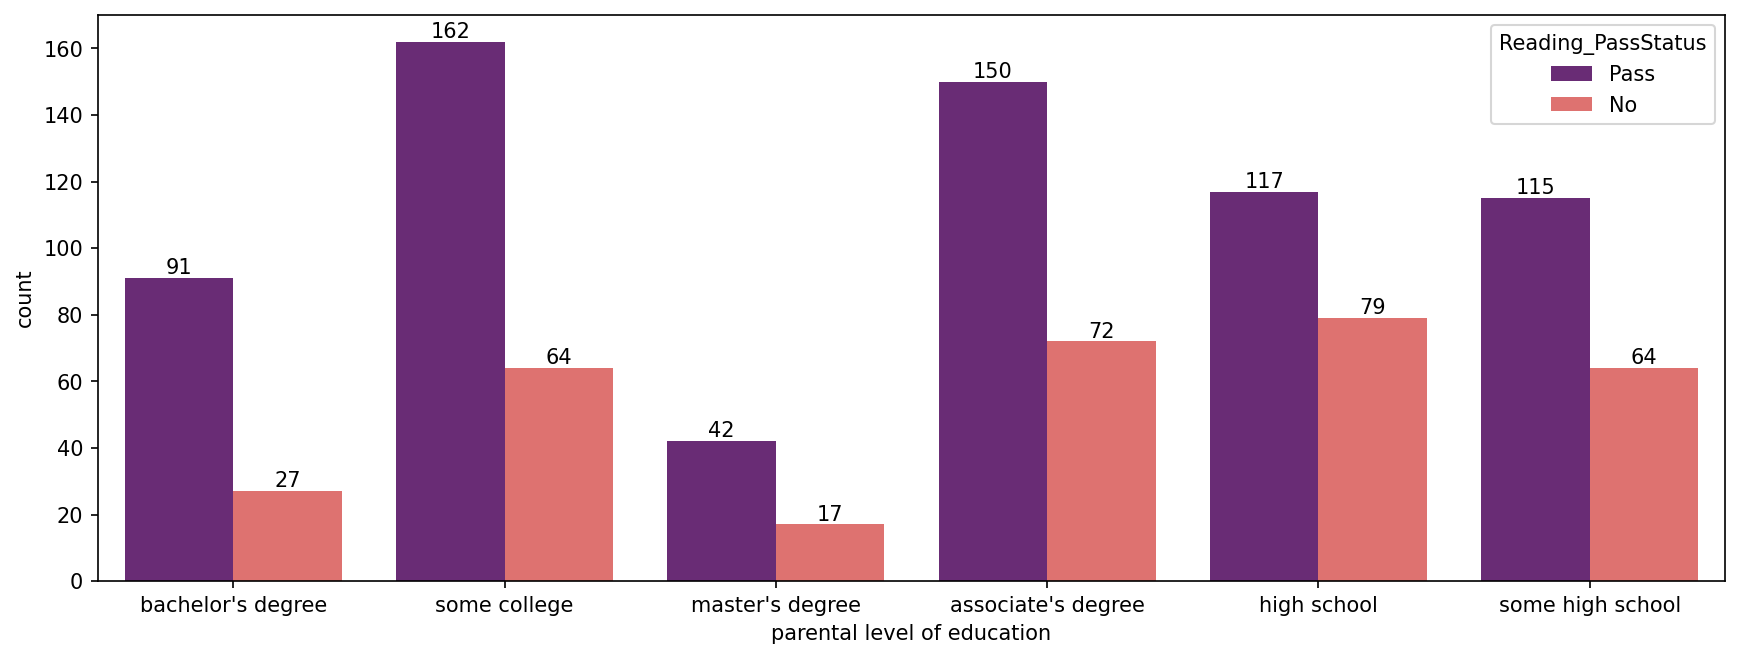

In [15]:
fig,ax = plt.subplots(figsize=(14,5),dpi=150)

sns.countplot(x=df['parental level of education'],hue=df['Reading_PassStatus'],palette='magma');
for container in ax.containers:
    ax.bar_label(container)

# Menganalisis sebaran writing score

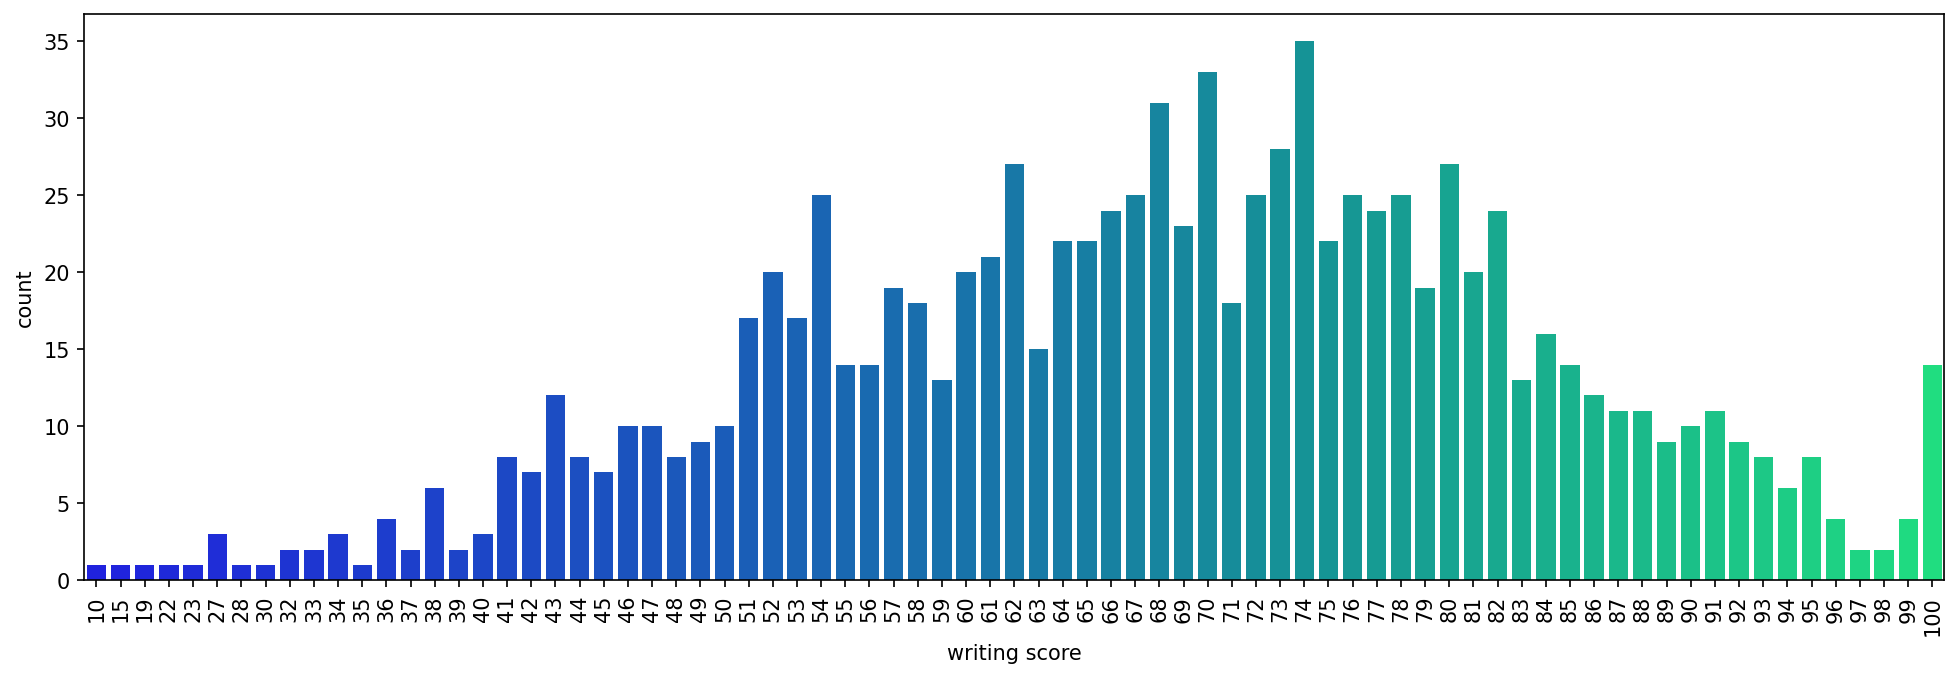

In [16]:
fig,ax = plt.subplots(figsize=(16,5),dpi=150)

sns.countplot(x=df['writing score'],palette='winter')

for label in ax.get_xticklabels():
    label.set(fontsize=10,rotation=90)

# membuat kolom yang berisi data pelajar yang lulus dan yang tidak lulus dalam ujian menulis

In [17]:
df['Wrting_Pass']=np.where(df['writing score']<batas_lulus, 'No', 'Pass')
df['Wrting_Pass'].value_counts()

Pass    719
No      281
Name: Wrting_Pass, dtype: int64

# Mengetahui berapa banyak pelajar yang lolos ujian menulis berdasarkan tingkat pendidikan orang tua

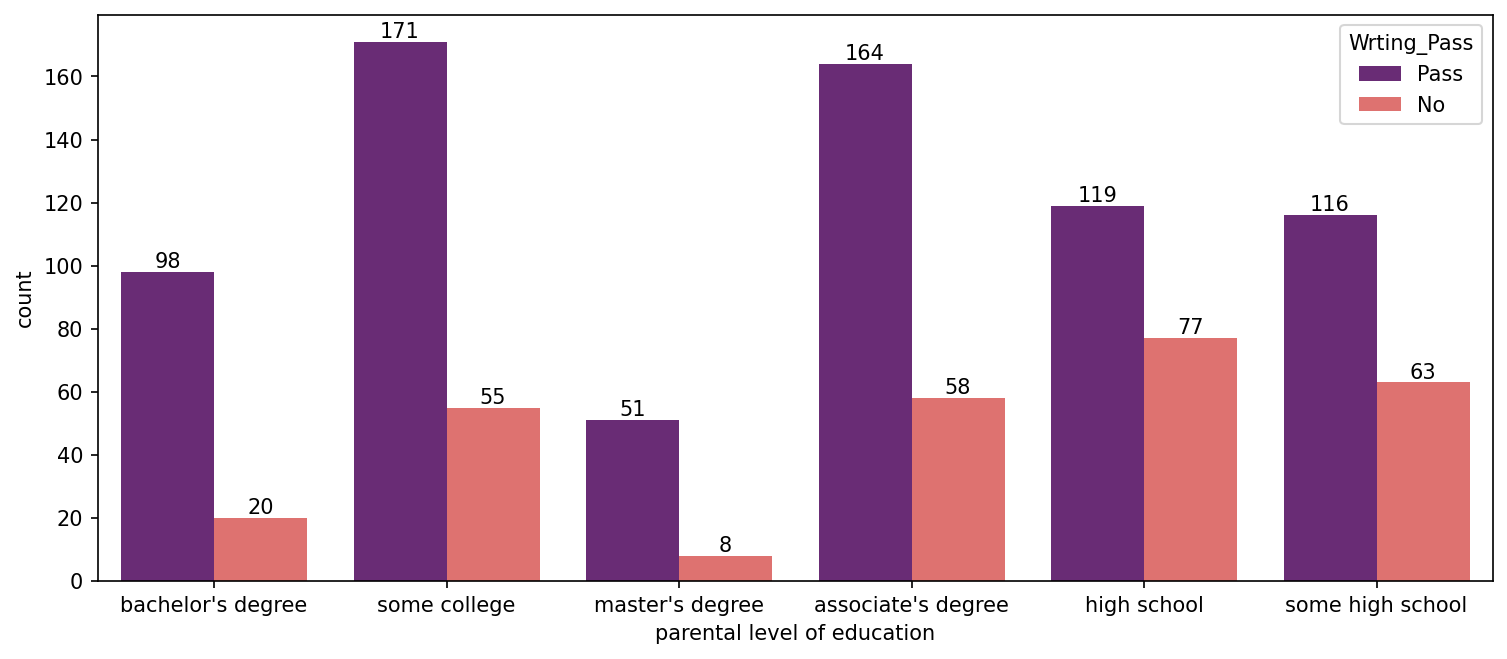

In [18]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)
  
sns.countplot(x=df['parental level of education'],hue=df['Wrting_Pass'],palette='magma');
for container in ax.containers:
    ax.bar_label(container)

# TAHAP ANALISIS DATA

## MELIHAT RATA-RATA NILAI PADA SISWA YANG MENGIKUTI KURSUS DAN YANG TIDAK MENGIKUTI KURSUS

In [19]:
plot_1 = df.groupby(by='test preparation course').mean()[['math score','reading score','writing score']]
plot_1

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Melihat sebaran nilai matematika terhadap tingkat pendidikan orang tua dan berdasarkan pelajar yang mengikuti kursus atau tidak.

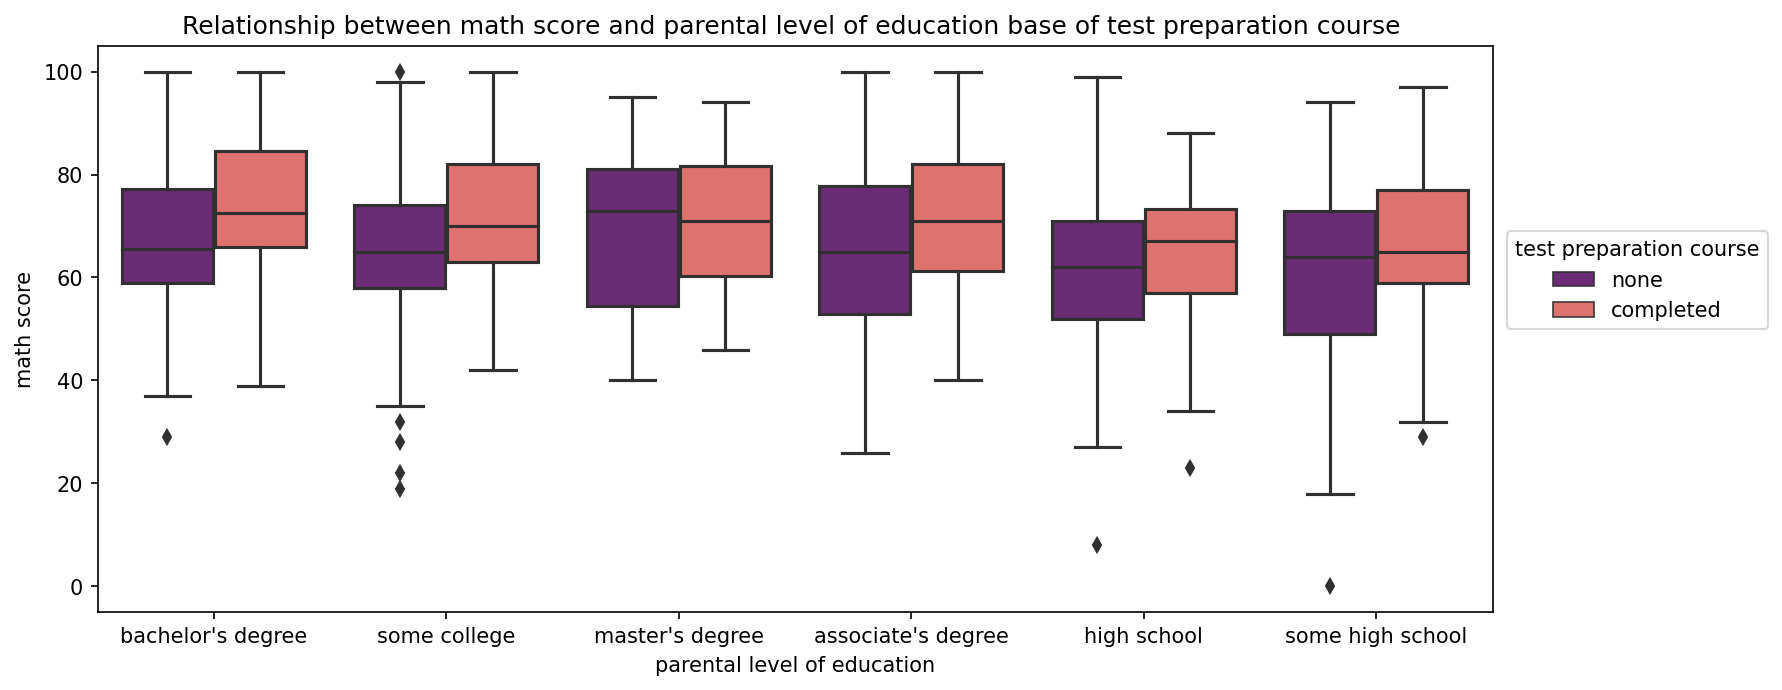

In [20]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.boxplot(x=df['parental level of education'],y=df['math score'],hue=df['test preparation course'],palette='magma')
ax.set(title='Relationship between math score and parental level of education base of test preparation course ')

plt.legend(loc=(1.01,.5),title='test preparation course');

## Melihat sebaran nilai membaca terhadap tingkat pendidikan orang tua berdasarkan pelajar yang mengikuti kursus atau tidak.

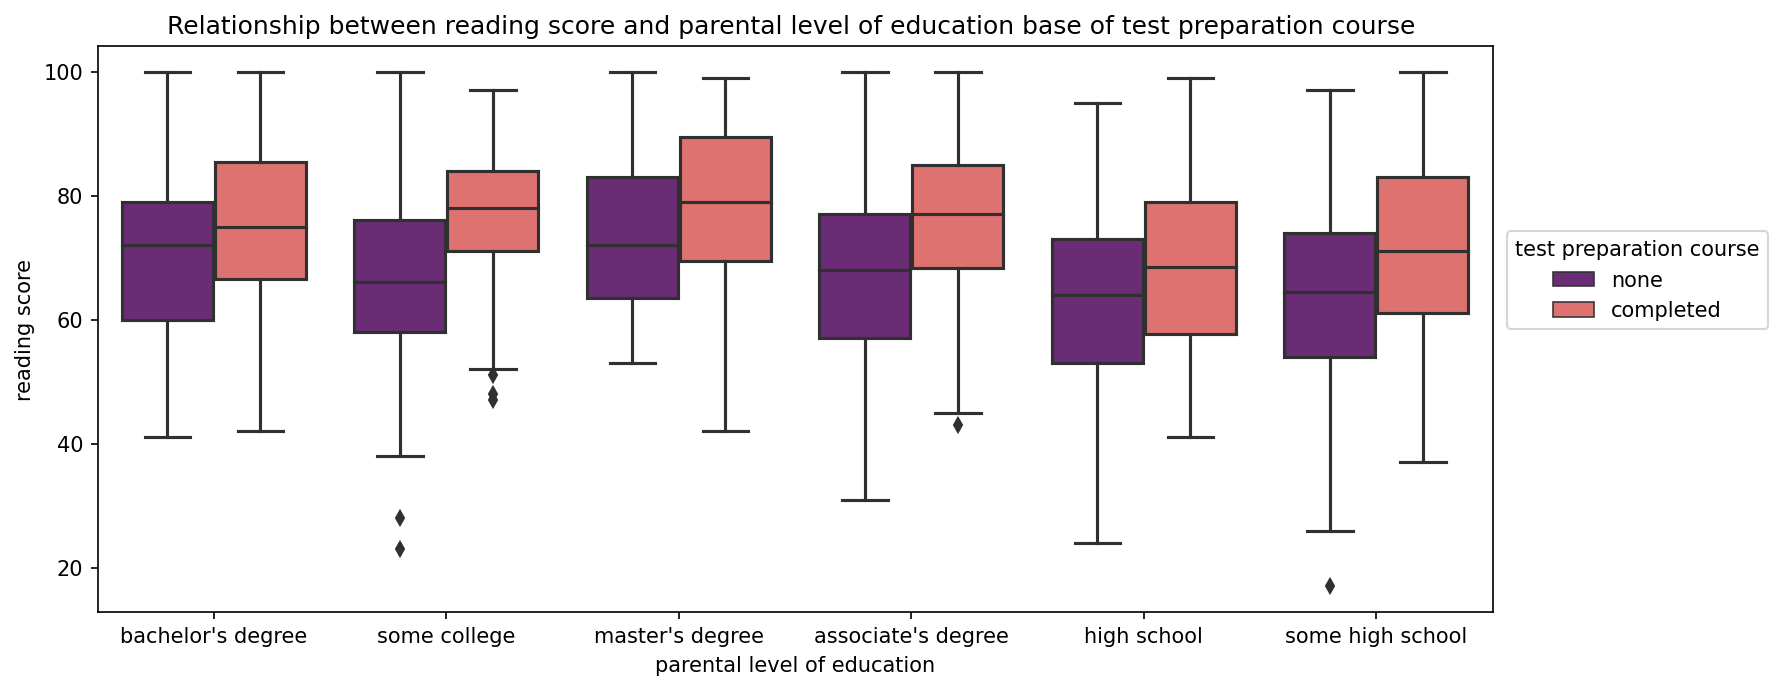

In [21]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.boxplot(x=df['parental level of education'],y=df['reading score'],hue=df['test preparation course'],palette='magma')
ax.set(title='Relationship between reading score and parental level of education base of test preparation course ')

plt.legend(loc=(1.01,.5),title='test preparation course');

## Melihat sebaran nilai menulis terhadap tingkat pendidikan berdasarkan pelajar yang mengikuti kursus atau tidak.

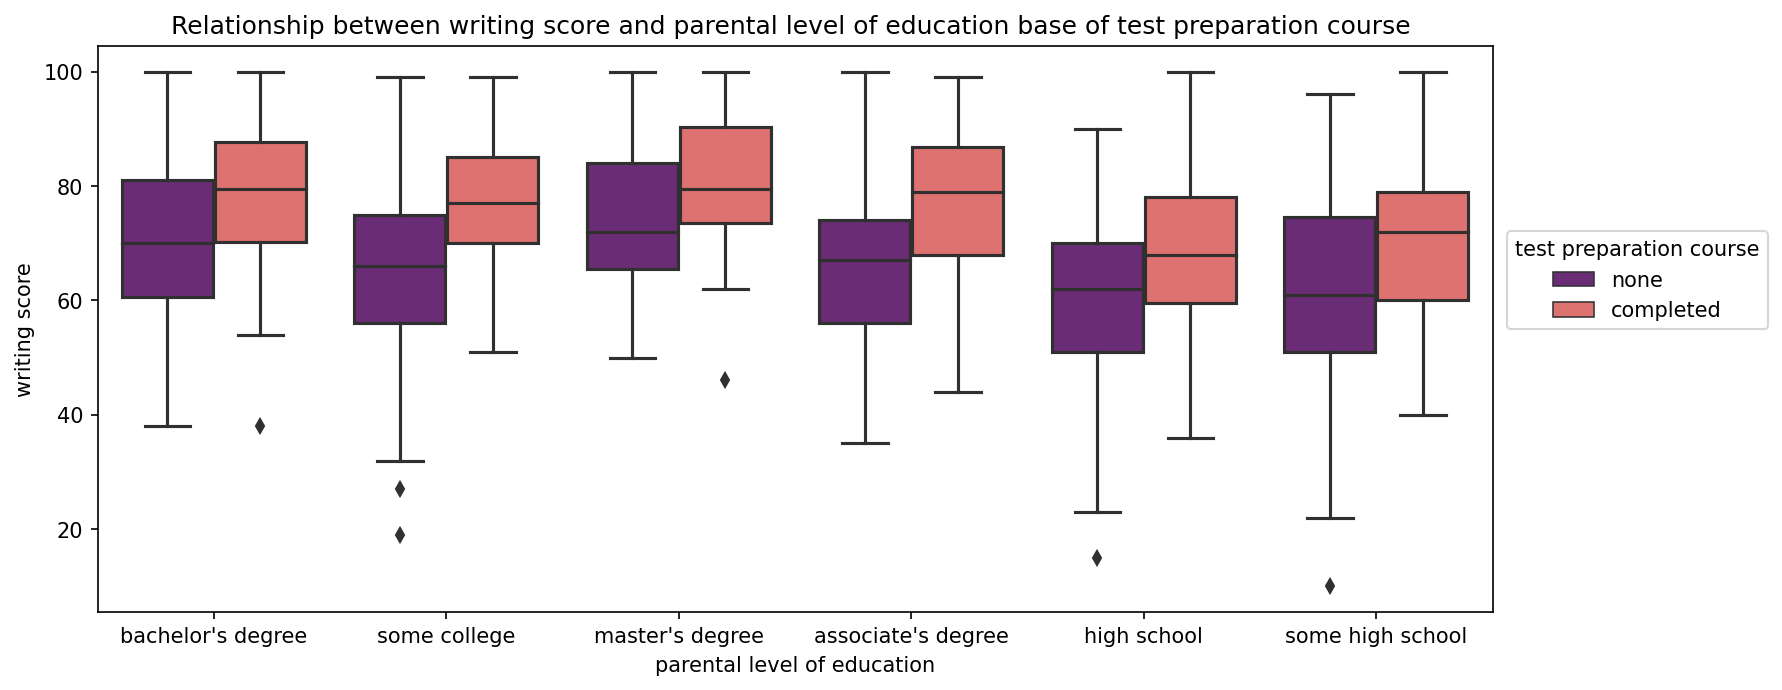

In [22]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.boxplot(x=df['parental level of education'],y=df['writing score'],hue=df['test preparation course'],palette='magma')
ax.set(title='Relationship between writing score and parental level of education base of test preparation course ')

plt.legend(loc=(1.01,.5),title='test preparation course');

# Melihat pengaruh kursus terhadap lulus nya pelajar dalam ujian

## mengetahui jumlah pelajar yang mengikuti kursus

In [23]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

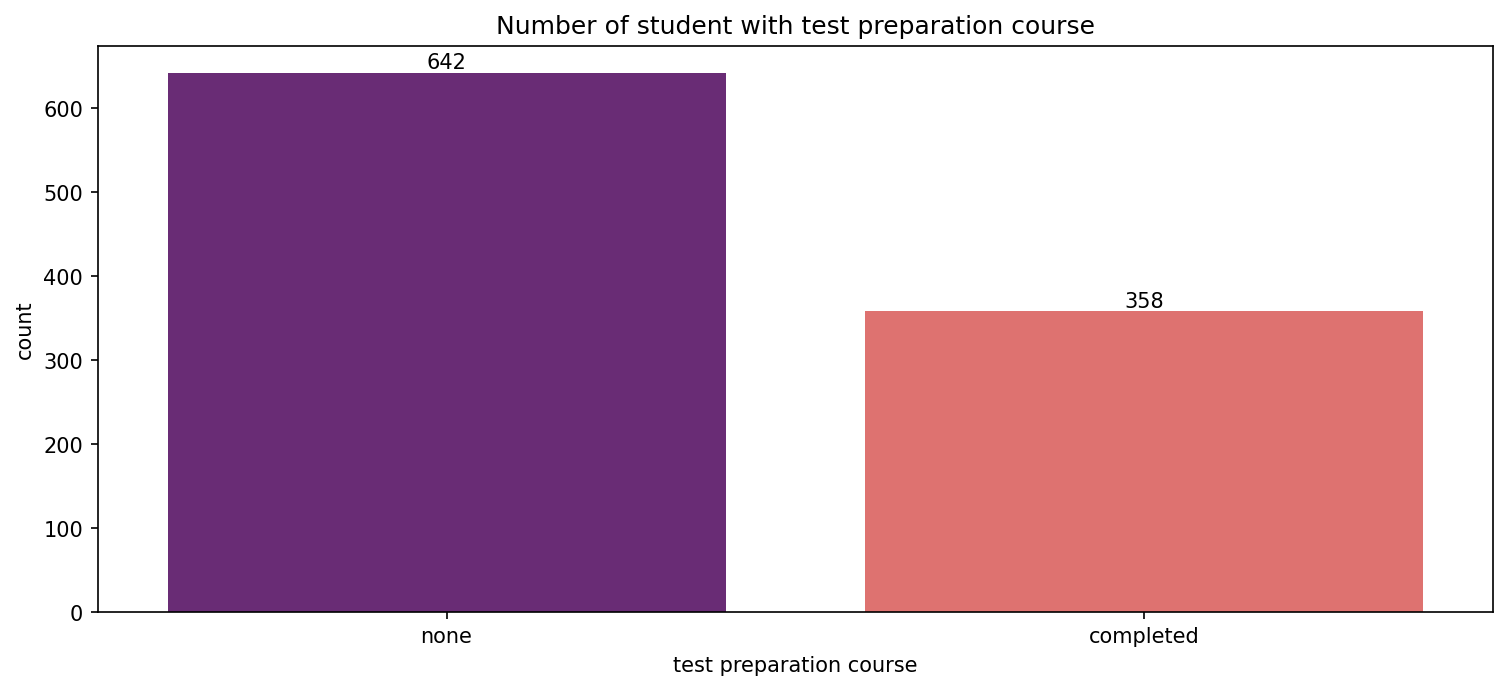

In [24]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.countplot(x=df['test preparation course'],palette='magma')
for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Number of student with test preparation course');

## Pengaruh kursus terhadap nilai ujian matematika

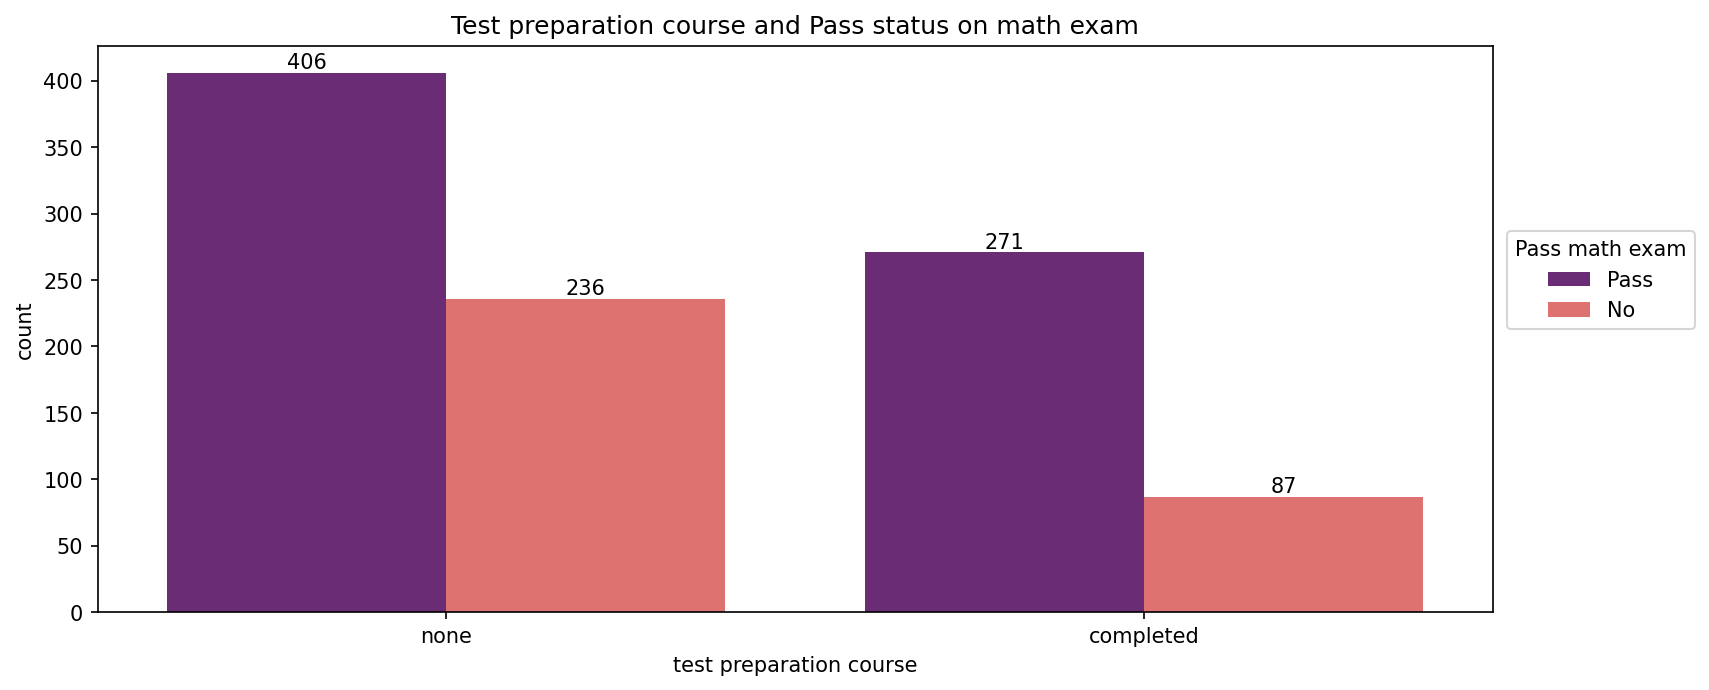

In [25]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.countplot(x=df['test preparation course'],hue=df['Math_PassStatus'],palette='magma')
for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Test preparation course and Pass status on math exam')

plt.legend(loc=(1.01,.5),title='Pass math exam');

# Pengaruh kursus terhadap nilai ujian membaca

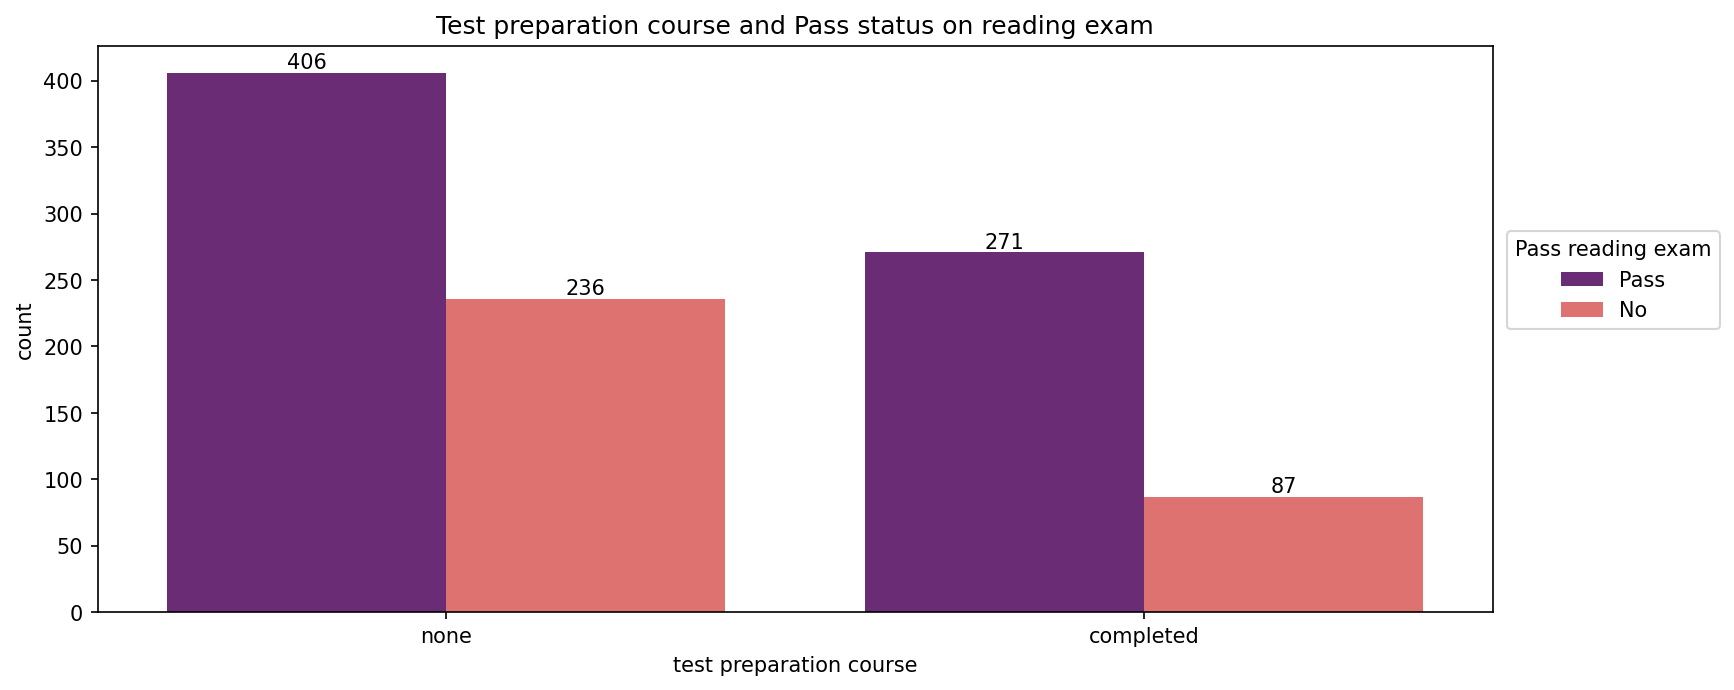

In [26]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.countplot(x=df['test preparation course'],hue=df['Reading_PassStatus'],palette='magma')
for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Test preparation course and Pass status on reading exam')

plt.legend(loc=(1.01,.5),title='Pass reading exam');

# Pengaruh kursus terhadap nilai ujian menulis

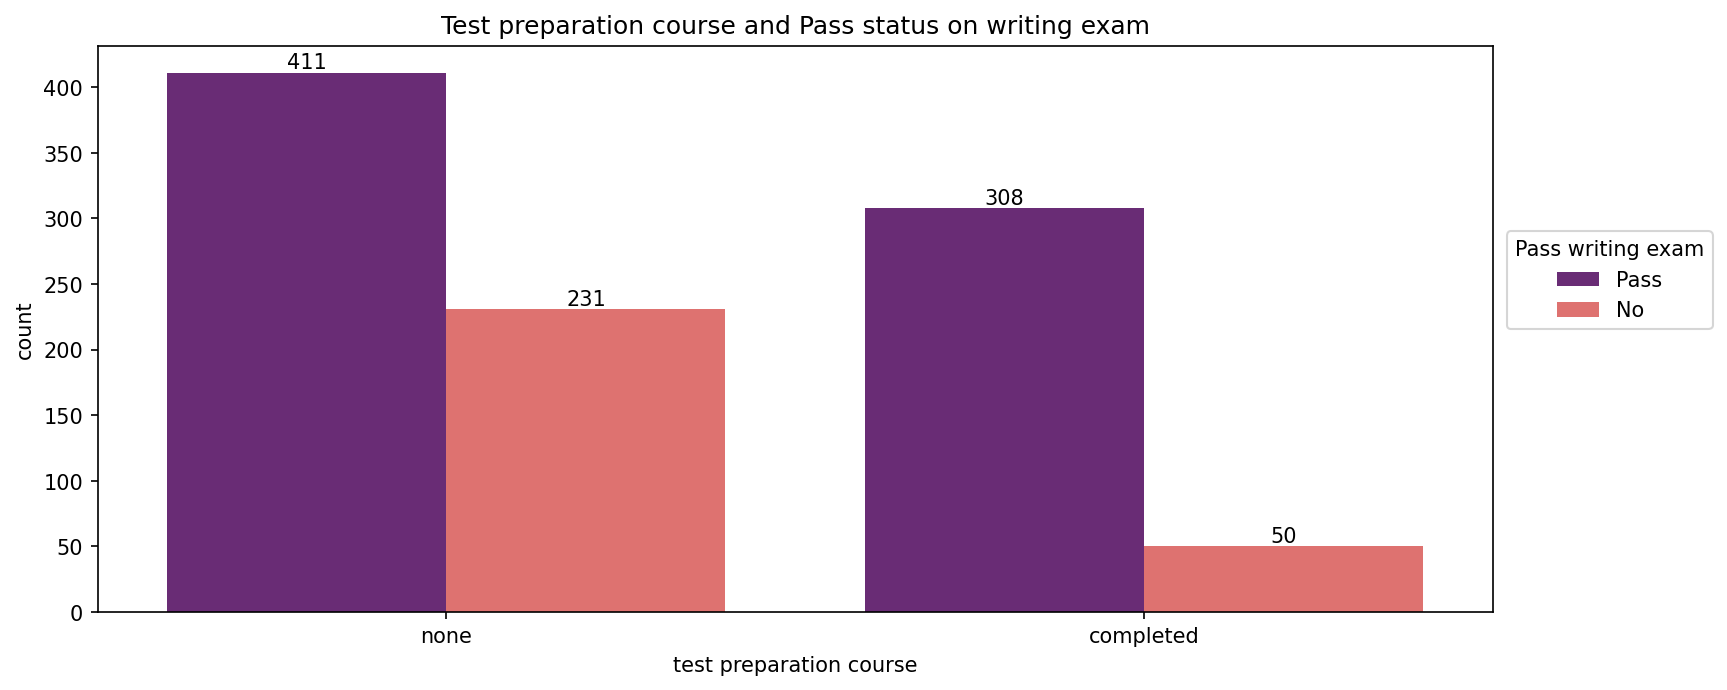

In [27]:
fig,ax = plt.subplots(figsize=(12,5),dpi=150)

sns.countplot(x=df['test preparation course'],hue=df['Wrting_Pass'],palette='magma')
for container in ax.containers:
    ax.bar_label(container)
ax.set(title='Test preparation course and Pass status on writing exam')

plt.legend(loc=(1.01,.5),title='Pass writing exam');

# Menyatukan data pengaruh kursus terhadap kelulusan pelajar kedalam satu gambar

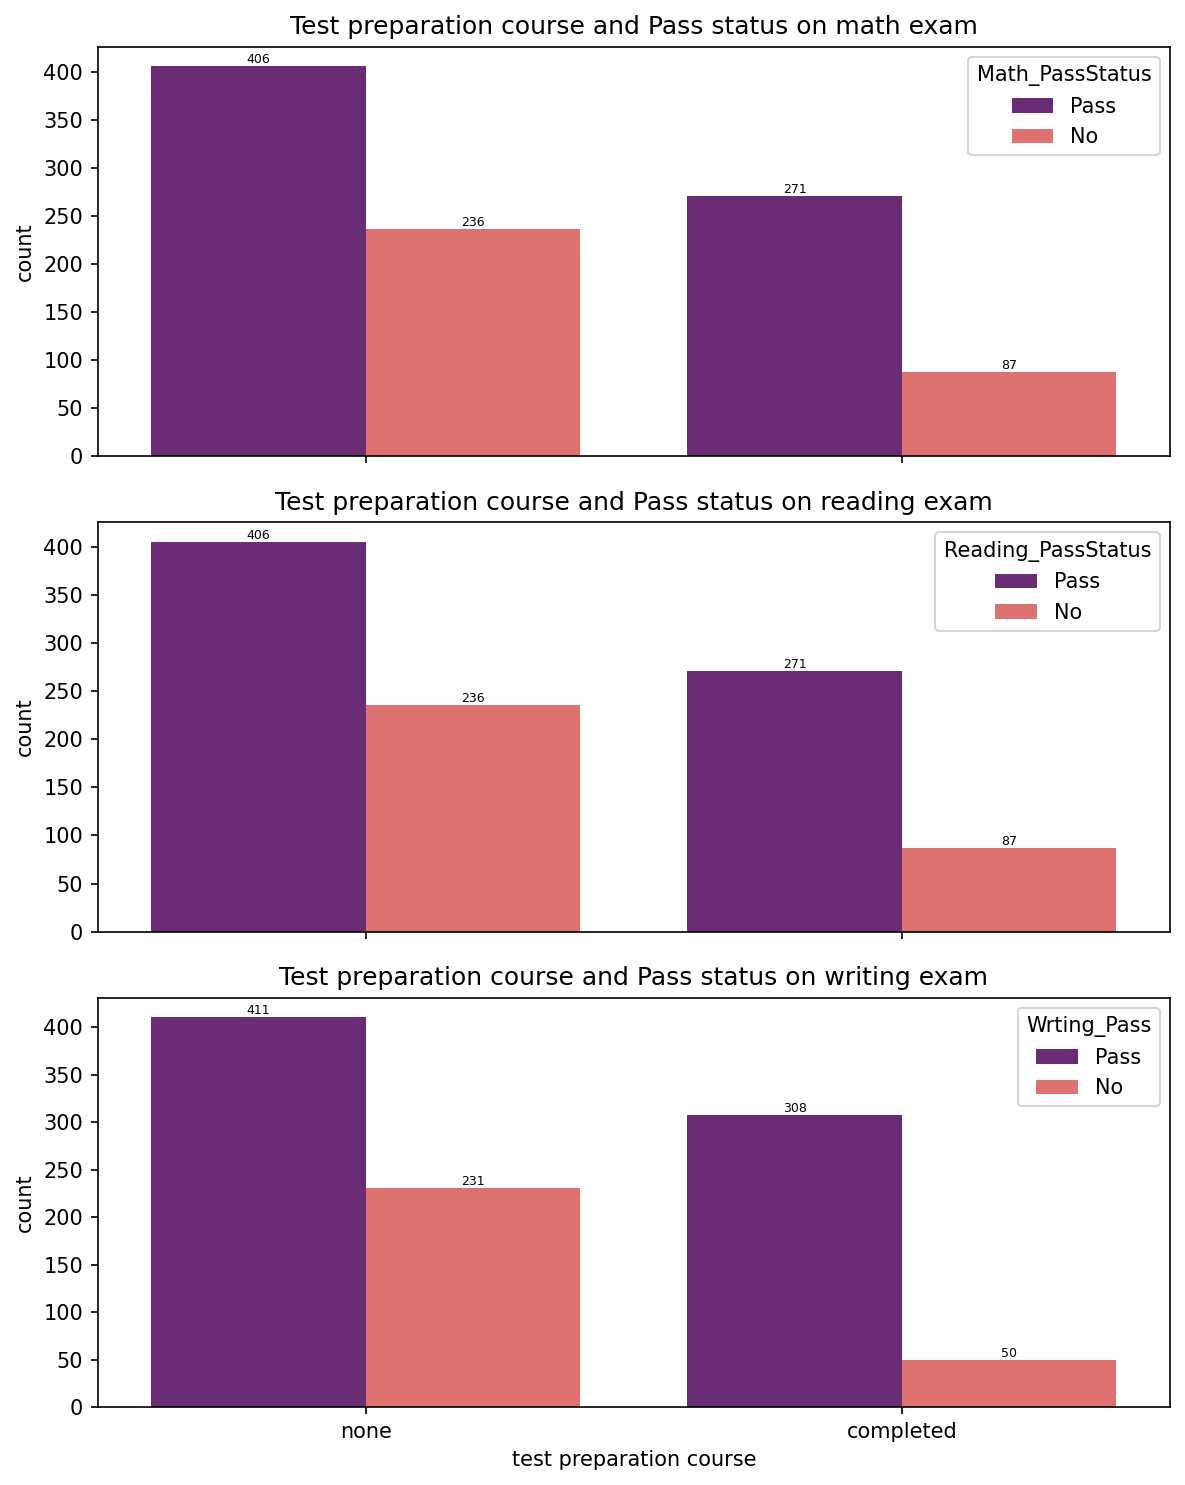

In [28]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,10),dpi=150,sharex=True)

# math
math = sns.countplot(ax=ax[0],x=df['test preparation course'],hue=df['Math_PassStatus'],palette='magma')
for container in ax[0].containers:
    ax[0].bar_label(container,fontsize=6)
ax[0].set(title='Test preparation course and Pass status on math exam',xlabel='')

# reading
reading = sns.countplot(ax=ax[1],x=df['test preparation course'],hue=df['Reading_PassStatus'],palette='magma')
for container in ax[1].containers:
    ax[1].bar_label(container,fontsize=6)
ax[1].set(title='Test preparation course and Pass status on reading exam',xlabel='')

#writing
writing = sns.countplot(ax=ax[2],x=df['test preparation course'],hue=df['Wrting_Pass'],palette='magma')
for container in ax[2].containers:
    ax[2].bar_label(container,fontsize=6)
ax[2].set(title='Test preparation course and Pass status on writing exam')

plt.tight_layout()
plt.show()

# Menyatukan data pengaruh parental level of education, dan test preparation course terhadap nilai pelajar

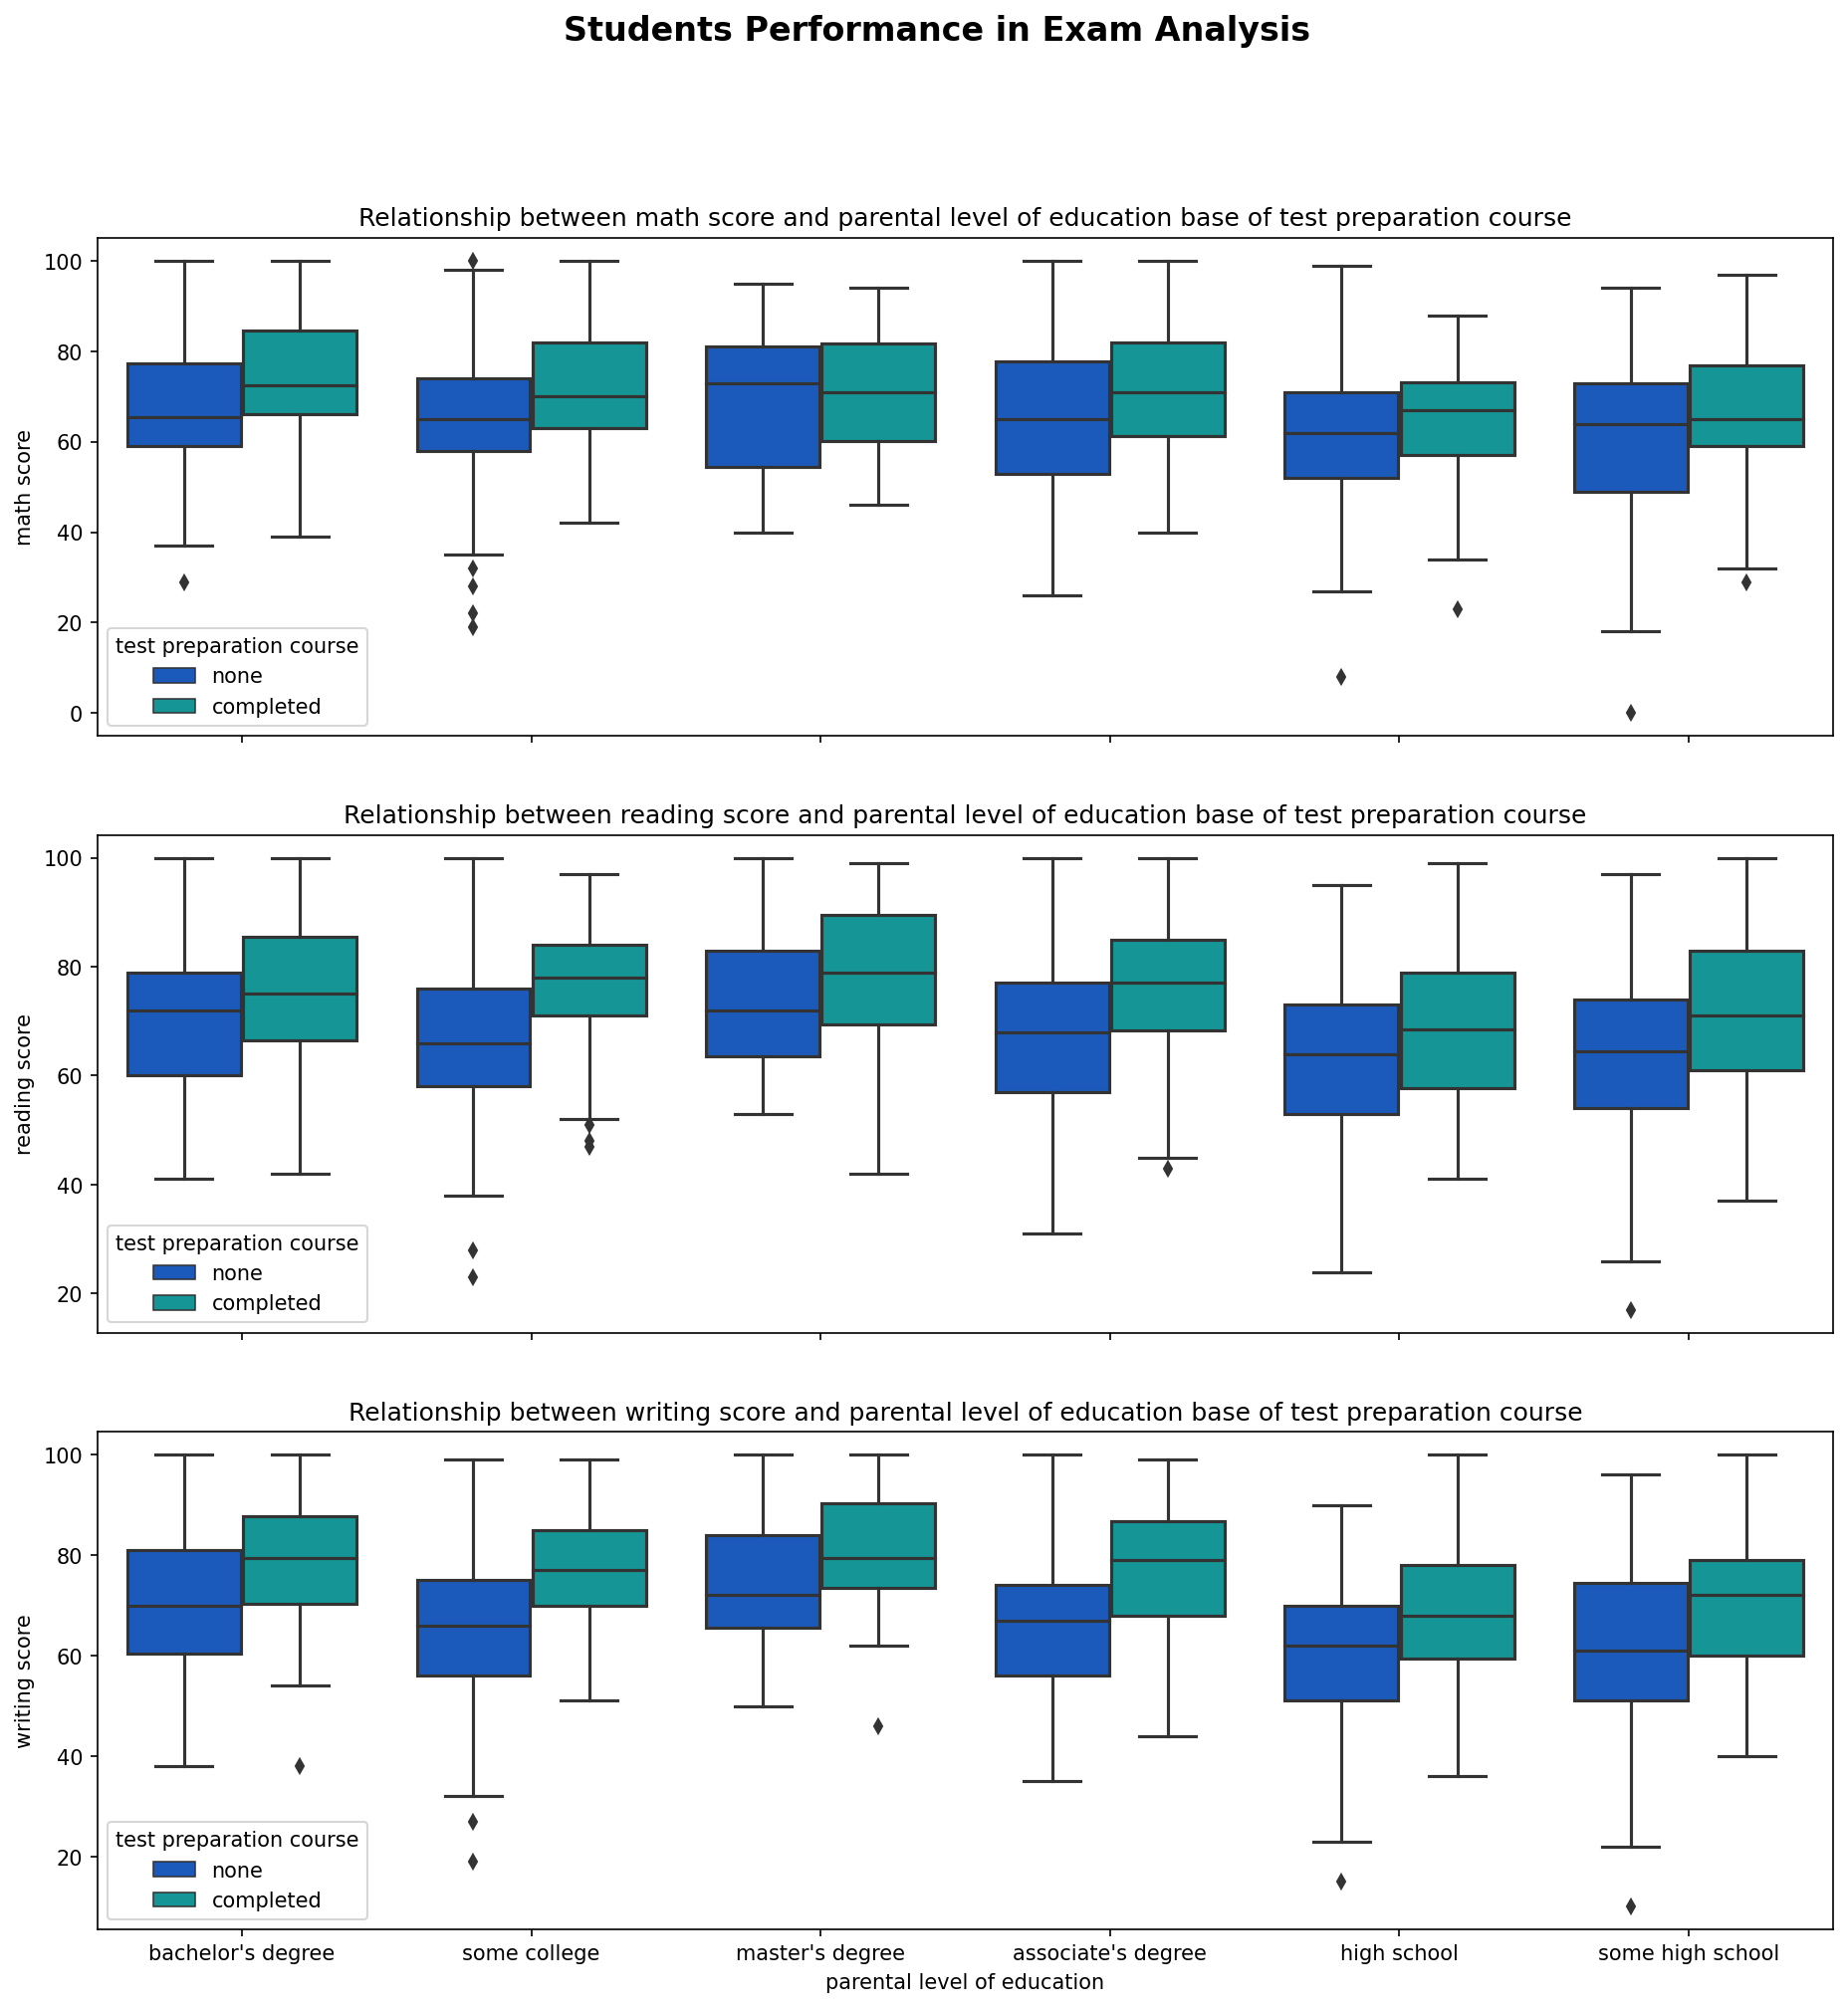

In [29]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15),dpi=150,sharex=True)

# math
math = sns.boxplot(ax=ax[0],x=df['parental level of education'],
                   y=df['math score'],hue=df['test preparation course'],palette='winter')
ax[0].set(title='Relationship between math score and parental level of education base of test preparation course',
         xlabel='')
ax[0].legend(loc='lower left',title='test preparation course')

# reading
reading = sns.boxplot(ax=ax[1],x=df['parental level of education'],
                   y=df['reading score'],hue=df['test preparation course'],palette='winter')
ax[1].set(title='Relationship between reading score and parental level of education base of test preparation course',
         xlabel='')
ax[1].legend(loc='lower left',title='test preparation course')


#writing
writing = sns.boxplot(ax=ax[2],x=df['parental level of education'],
                   y=df['writing score'],hue=df['test preparation course'],palette='winter')
ax[2].set(title='Relationship between writing score and parental level of education base of test preparation course');

fig.suptitle("Students Performance in Exam Analysis",fontsize=16,fontweight='bold');
plt.savefig('Students Performance.png');

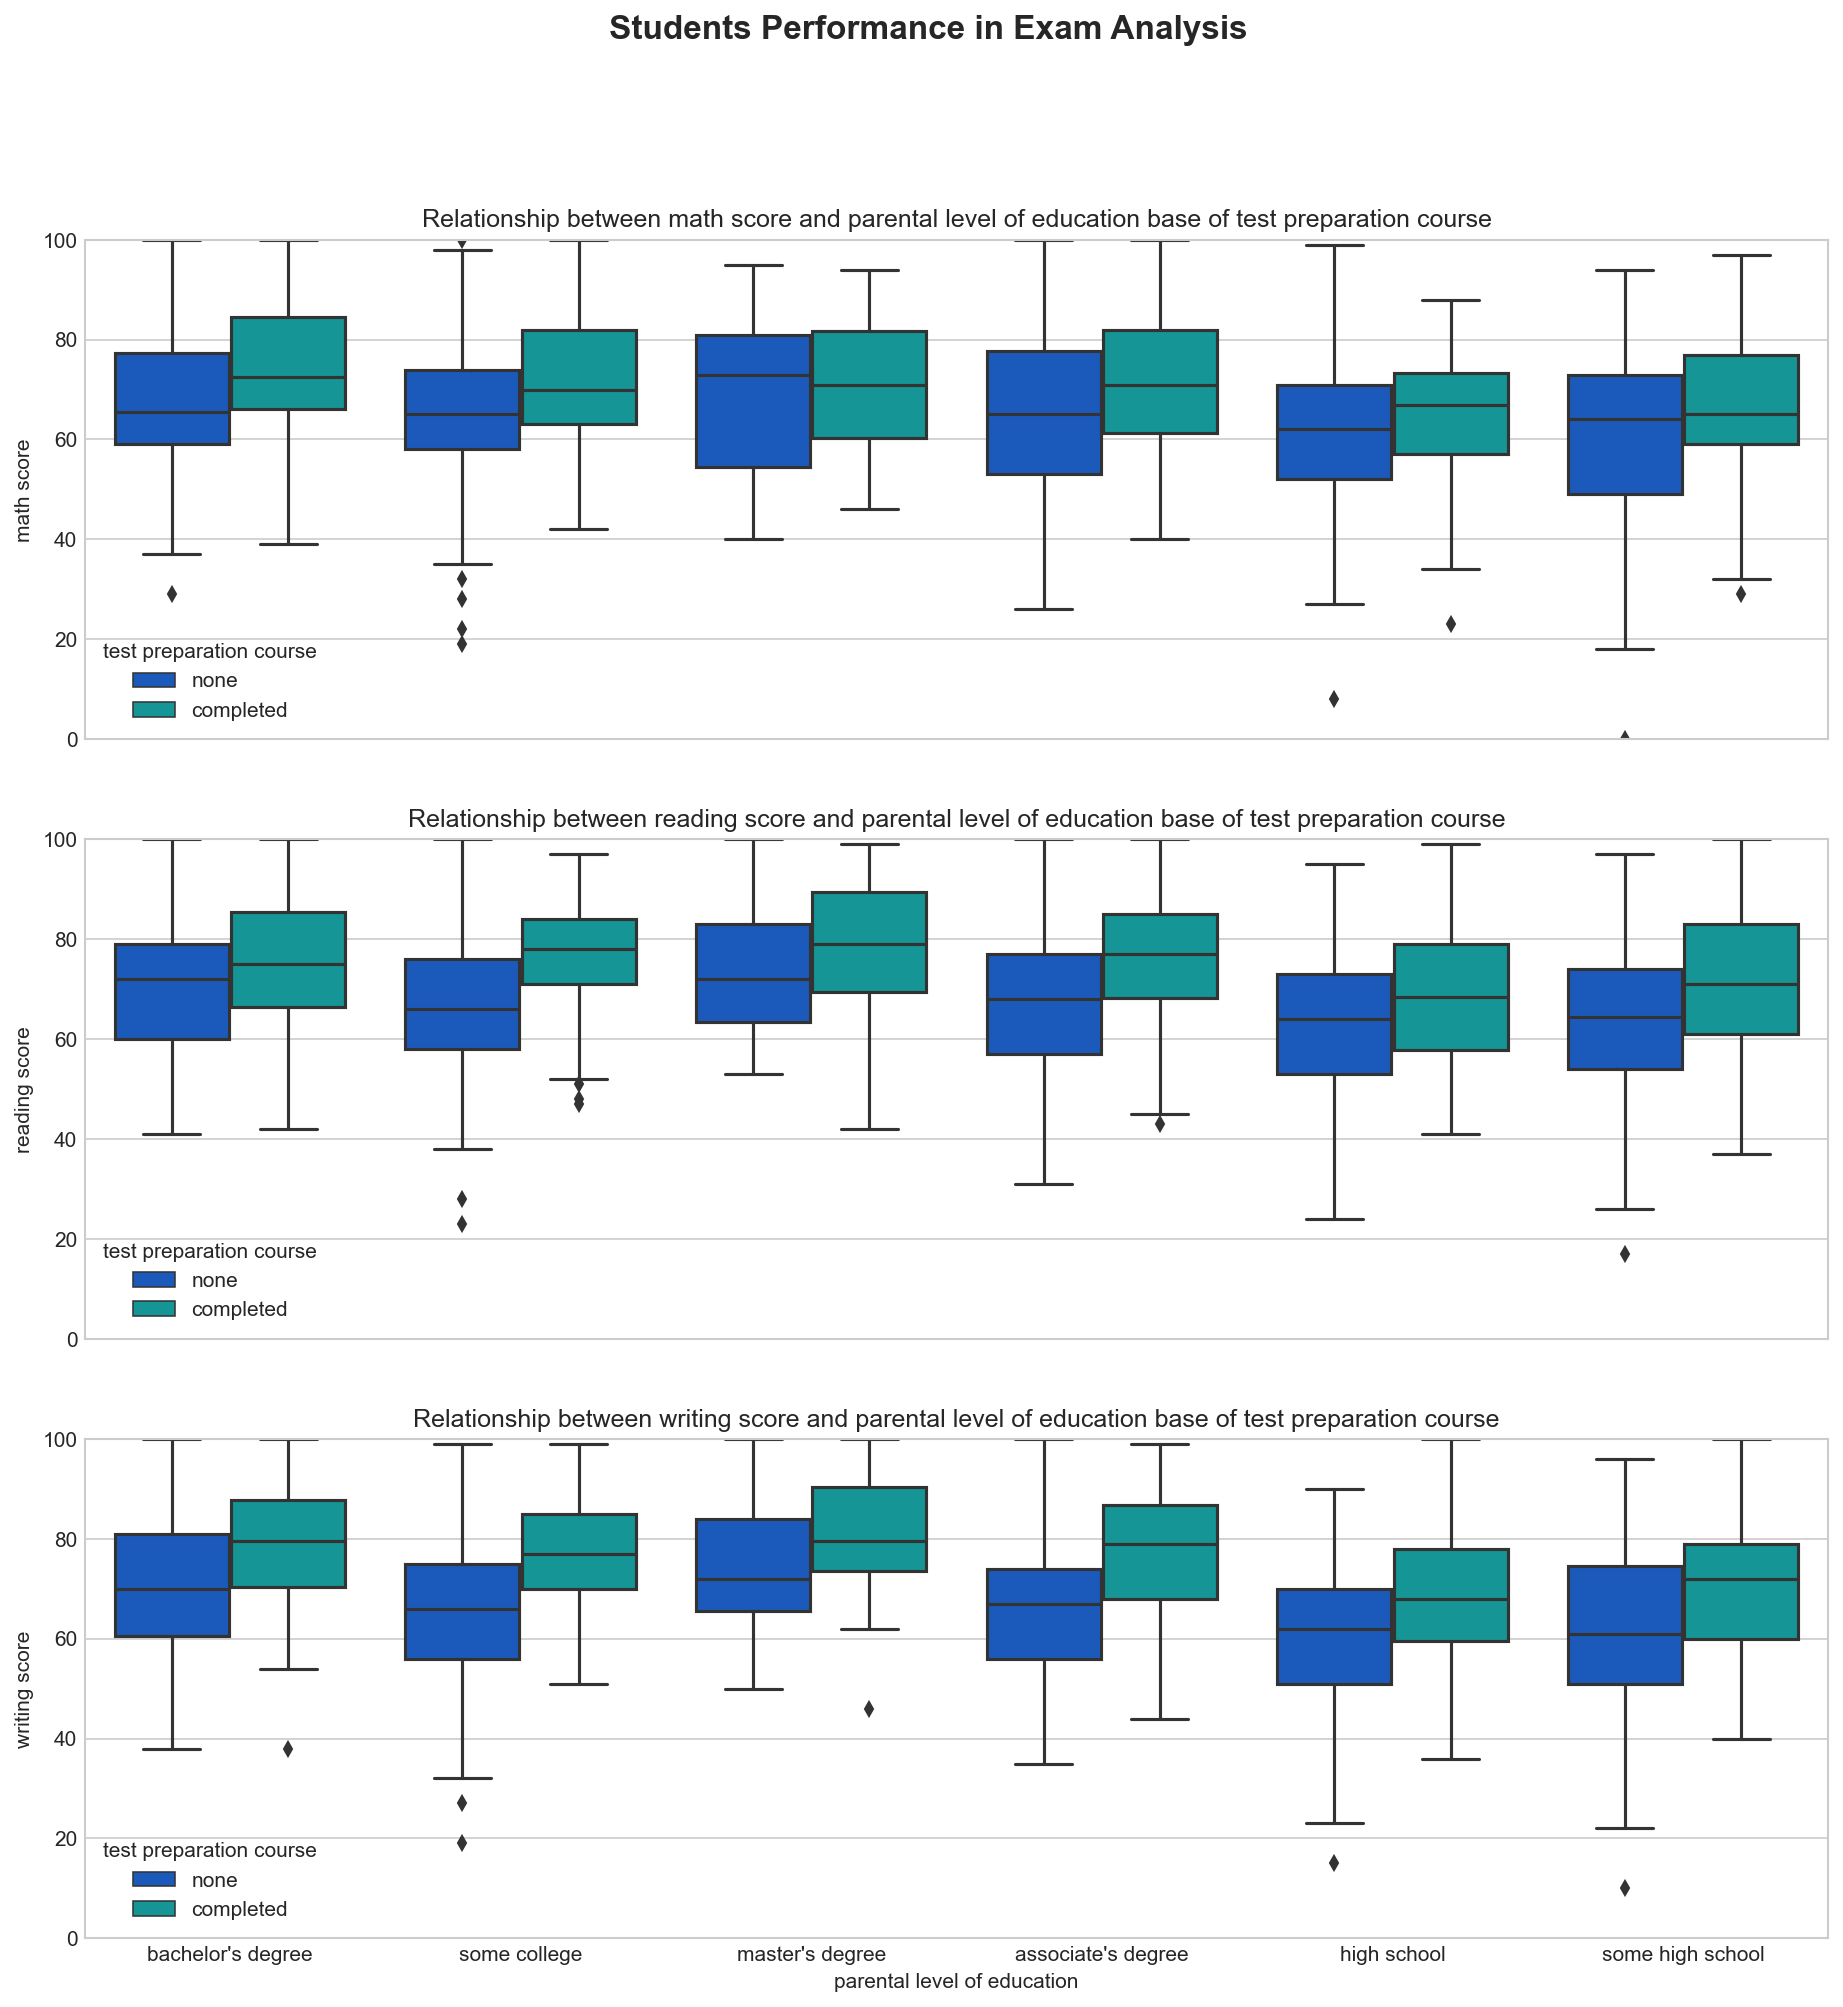

In [31]:
plt.style.use('seaborn-whitegrid')

fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,15),dpi=150,sharex=True)

# math
math = sns.boxplot(ax=ax[0],x=df['parental level of education'],
                   y=df['math score'],hue=df['test preparation course'],palette='winter')
ax[0].set(title='Relationship between math score and parental level of education base of test preparation course',
         xlabel='',ylim=(0,100))
ax[0].legend(loc='lower left',title='test preparation course')

# reading
reading = sns.boxplot(ax=ax[1],x=df['parental level of education'],
                   y=df['reading score'],hue=df['test preparation course'],palette='winter')
ax[1].set(title='Relationship between reading score and parental level of education base of test preparation course',
         xlabel='',ylim=(0,100))
ax[1].legend(loc='lower left',title='test preparation course')


#writing
writing = sns.boxplot(ax=ax[2],x=df['parental level of education'],
                   y=df['writing score'],hue=df['test preparation course'],palette='winter')
ax[2].set(title='Relationship between writing score and parental level of education base of test preparation course',
         ylim=(0,100));
ax[2].legend(loc='lower left',title='test preparation course')
fig.suptitle("Students Performance in Exam Analysis",fontsize=16,fontweight='bold');
plt.savefig('Students Performance.png');

# Kesimpulan

### Tidak dapat dipungkiri bahwa rata-rata pelajar yang mengikuti kursus cenderung memiliki nilai yang lebih tinggi dan lebih berpeluang lulus dalam ujian, namun tidak sedikit juga yang gagal ujian walaupun telah mengikuti kursus. Kemudian dapat diambil kesimpulan bahwa pelajar yang memiliki orang tua dengan pendidikan high school, dan some high school cenderung memiliki nilai yang lebih rendah, dibandingkan pelajar dengan orang tua dengan pendidikan yang lebih tinggi